In [5]:
from XYTrigModel import XYTrigModel
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

N_Epoch = 10
N_Train = 5000              # 1000 lead to overfitting
N_Valid = 500
Sigma = 0.1                 # Do not have too sparse data

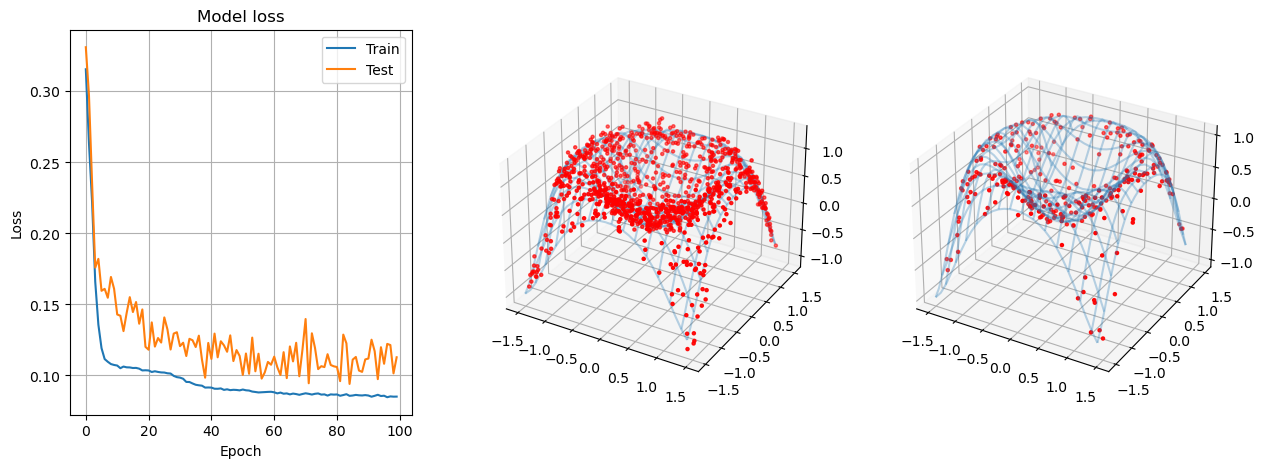

In [6]:
N_Layer = 4
Shape = [50, 20, 20, 10]        
N_Epochs_Final = 100

figure = plt.figure()
figure.set_size_inches(15, 5)

TM = XYTrigModel(N_Epochs_Final, N_Train, N_Valid, Sigma, N_Layer, Shape, 'rmsprop', 'mae', 'leaky_relu', False)
TM.TrainModel()

loss_ax = figure.add_subplot(1, 3, 1)
train_ax = figure.add_subplot(1, 3, 2, projection = '3d')
predict_ax = figure.add_subplot(1, 3, 3, projection = '3d')

# look into training history
# Plot training & validation loss values
loss_ax.plot(TM.history.history['loss'])
loss_ax.plot(TM.history.history['val_loss'])
loss_ax.set_title('Model loss')
loss_ax.set_ylabel('Loss')
loss_ax.set_xlabel('Epoch')
loss_ax.legend(['Train', 'Test'], loc='best')
loss_ax.grid(True)

x_surf = np.arange(-3/2,3/2, 0.1)
y_surf = np.arange(-3/2,3/2, 0.1)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)

train_ax.scatter(TM.train_data[:1000, 0], TM.train_data[:1000, 1], TM.z_train[:1000], color='r', marker = '.')      # Plot the first 1000 train points
train_ax.plot_wireframe( X_surf, Y_surf, TM.F(X_surf,Y_surf), rstride = 2, cstride = 2, alpha = 0.3)
train_ax.grid(True)

x_predicted = np.random.uniform(-3/2, 3/2, 300)
y_predicted = np.random.uniform(-3/2, 3/2, 300)
data_predicted = np.asarray([x_predicted, y_predicted]).transpose()

z_predicted = TM.model.predict(data_predicted, verbose = TM.verbose)
predict_ax.scatter(x_predicted, y_predicted, z_predicted, color='r', marker = '.')                      # Use a smaller marker not to overcrowd graph
predict_ax.plot_wireframe( X_surf, Y_surf, TM.F(X_surf,Y_surf), rstride = 2, cstride = 2, alpha = 0.3)
predict_ax.grid(True)

plt.show()